In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import nltk

In [4]:
header_list = ["id", "label", "statement", "subject", "speaker", 
               "speaker_job", "speaker_state", "speaker_affiliation", 
               "barely_true_counts", "false_counts", "half_true_counts", 
               "mostly_true_counts", "pants_on_fire_counts", "context"]

train_data = pd.read_csv('../data/raw/train.tsv', sep='\t',  names=header_list)
val_data = pd.read_csv('../data/raw/valid.tsv', sep='\t',  names=header_list)
test_data = pd.read_csv('../data/raw/test.tsv', sep='\t', names=header_list)

In [5]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_data.shape)
    print(train_data.head(10))

    print("validation dataset size:")
    print(val_data.shape)
    print(val_data.head(10))
    
    print("test dataset size:")
    print(test_data.shape)
    print(test_data.head(10))

In [6]:
data_obs()

training dataset size:
(10240, 14)
           id        label                                          statement  \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         true  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                     subject                 speaker  \
0

In [7]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sn.countplot(x='label', data=dataFile, palette='hls')

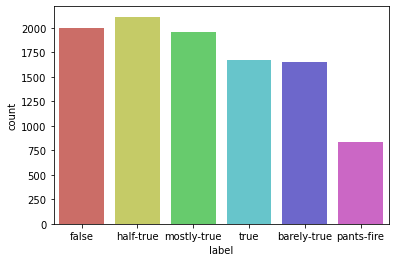

In [8]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_data)

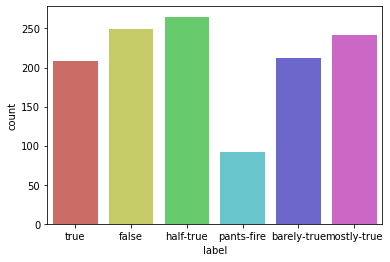

In [9]:
create_distribution(test_data)

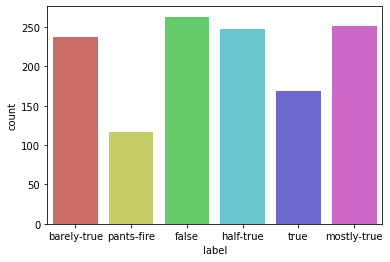

In [10]:
create_distribution(val_data)

In [11]:
train_data.info(), test_data.info(), val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10240 non-null  object 
 1   label                 10240 non-null  object 
 2   statement             10240 non-null  object 
 3   subject               10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   speaker_job           7343 non-null   object 
 6   speaker_state         8032 non-null   object 
 7   speaker_affiliation   10238 non-null  object 
 8   barely_true_counts    10238 non-null  float64
 9   false_counts          10238 non-null  float64
 10  half_true_counts      10238 non-null  float64
 11  mostly_true_counts    10238 non-null  float64
 12  pants_on_fire_counts  10238 non-null  float64
 13  context               10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB
<class 'pandas.core.fra

(None, None, None)

In [12]:
print(train_data['label'].value_counts())
print(val_data['label'].value_counts())
print(test_data['label'].value_counts())
# Mapping of lables
# True -- True
# Mostly-true -- True
# Half-true -- True
# Barely-true -- False
# False -- False
# Pants-fire -- False

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64
false          263
mostly-true    251
half-true      248
barely-true    237
true           169
pants-fire     116
Name: label, dtype: int64
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: label, dtype: int64


In [13]:
def map_lables(train,test,val):
    labels_dict = {'true': 'true','mostly-true': 'true',
                   'half-true':'true', 'false':'false', 
                   'barely-true':'false','pants-fire':'false'}
    
    train= train.replace({"label": labels_dict})[['label','statement']]
    test = test.replace({"label": labels_dict})[['label','statement']]
    val = val.replace({"label": labels_dict})[['label','statement']]
    display(train.head(3), test.head(3), val.head(3))
    
    return train, test, val  

In [14]:
train_news, test_news, val_news = map_lables(train_data,test_data,val_data)

,label,statement
0,false,Says the Annies List political group supports ...
1,true,When did the decline of coal start? It started...
2,true,"Hillary Clinton agrees with John McCain ""by vo..."


,label,statement
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...


,label,statement
0,false,We have less Americans working now than in the...
1,false,"When Obama was sworn into office, he DID NOT u..."
2,false,Says Having organizations parading as being so...


In [15]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking train data qualitites...")
    print(train_news.isnull().sum())
    print(train_news.info())
        
    print("check finished...")
    print()

    print("Checking test data qualitites...")
    print(test_news.isnull().sum())
    print(test_news.info())
    print("check finished...")
    print()
    
    print("Checking validation data qualitites...")
    print(val_news.isnull().sum())
    print(val_news.info())

In [16]:
data_qualityCheck()

Checking train data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10240 non-null  object
 1   statement  10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB
None
check finished...

Checking test data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   object
dtypes: object(2)
memory usage: 19.9+ KB
None
check finished...

Checking validation data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #

AxesSubplot(0.125,0.125;0.775x0.755)


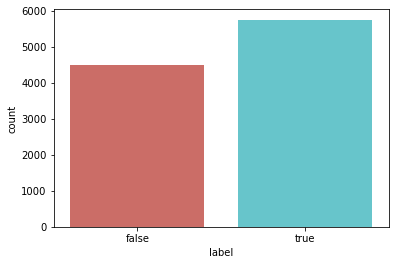

In [17]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
print(create_distribution(train_news))

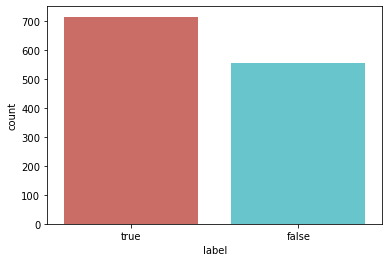

In [18]:
create_distribution(test_news)

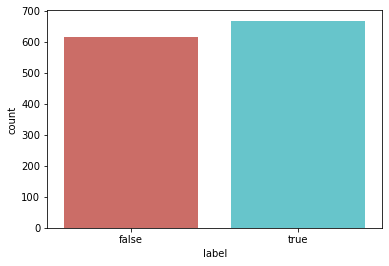

In [19]:
create_distribution(val_news)

In [20]:
train_news.to_csv('../data/processed/train.csv', index=False)
val_news.to_csv('../data/processed/val.csv', index=False)
test_news.to_csv('../data/processed/test.csv', index=False)                          